# Stage 5 – Modeling

## Modeling (5 points)
The model is using transfer learning with a pre-trained zoo model called [SSD_MobileNet_v2_fpnlite_320x320_coco17](https://github.com/nicknochnack/RealTimeObjectDetection/tree/main/Tensorflow/workspace/pre-trained-models/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8). The model makes predictions of where the bounding boxes are for various coins and paper currency and predicts what type of currency it is. There are 11 classes from which the model is attempting to differentiate from. These classes are OneBill, TwoBill, FiveBill, TenBill, TwentyBill, FiftyBill, HundredBill, Penny, Nickel, Dime, and Quarter. The classification loss function is weighted sigmoid focal loss and the object localization loss is weighted smooth L1 loss. We used a learning rate of approximately 0.08, a batch size of 4, and a momentum optimizer. The model uses a Convolutional Box Predictor. The model has 4 layers before the predictor and uses a kernel size of 3.

## Experimentation (3 points)
To create our object detector, we divided the responsibilities into three major tasks, all executed using Google Colab:
1. **Data Pre-processing and Preparation**  
Each team member collected an average of 120 pictures with multiple U.S. currencies. The currencies in each picture were then labeled accordingly, and an XML (Pascal VOC 1.0) file was exported for each one of the pictures. All of the pictures and their corresponding annotation files were aggregated (n=625) and then randomly divided into training and testing sets of 70% (n_1=437) and 30% (n_2=188) respectively.
2. **Model Creation and Training**  
Since our data was “inconsistent” in nature (many objects per picture; pictures of varying sizes), we opted for a library that would automatically handle these cases. We used Tensorflow’s Object Detection API to take advantage of transfer learning in our model architecture and to take care of the inconsistencies in our data. At the moment, we have only experimented with the SSD_MobileNet_320x320_COCO17 pre-trained model, but hope to try more models in future versions.
3. **Real-time detection**  
After our model was trained, we used CV2 and a webcam to evaluate our model in real-time. For model details on our model’s performance, see the “Results” section below.

## Literature Review (2 points)
In [Zhang et al.’s work](https://link.springer.com/article/10.1007/s42786-018-00007-1) on using deep learning for currency recognition, they discuss multiple models such as convolutional neural networks (CNN), single-shot, multi-box detector (SSD), and multilayer perception  (MLP). They explain that SSDs perform more accurately and quickly than region-based CNN (R-CNN) and ResNet models at real-time detection. These findings led us to use a single shot, multi-box detector model.

The [SSD model](https://arxiv.org/abs/1512.02325) is a convolutional neural network that computes bounding boxes of images. For training, SSD takes in input images and ground truth bounding boxes and then computes default boxes of different sizes and aspect ratios. After computing the default boxes, the boxes with the most overlap to the ground truth boxes are chosen. Loss is calculated in two ways: 
- Confidence loss: the confidence of the object found in the box (utilizes softmax)
- Localization loss: the difference between the computed box and the ground truth (utilizes Smooth L1)

We are not just using an SSD, we are using a MobileNet SSD. A MobileNet SSD is a SSD model built on top of MobileNet. [MobileNets](https://arxiv.org/pdf/1704.04861.pdf) use depthwise separable convolutions that are composed of depthwise and pointwise convolutions. The advantage of using depth-wise separable convolutions is that it performs a convolution on each color channel rather than one on all three channels at the same time.

In addition to using a MobileNet SSD, we are using transfer learning. Transfer learning (TL) tries to solve the problem of being able to quickly learn new features from old features. For example, a human that knows how to play badminton will only have to learn a few things in order to play tennis (game rules, different ball size/force needed, etc.). Transfer learning is exactly the same but for machine learning. We decided to use transfer learning because of its adaptability to new data. According to a paper by [Pann and Yang](https://ieeexplore.ieee.org/document/5288526) on transfer learning, they explain that one of TL’s main use cases is when new data is not the same as the data used when training the data (Ex: the distribution of the data has changed or creating labeled data is expensive). The adaptability of transfer learning is great for our  project on real-time detection.


## Results (3 points)
The model resulted in an accuracy of 65.79% on the test set of data after being trained. The model was then used to implement real-time detection using a webcam. This resulted in poor results which can be seen in the image below. The model was able to detect and apply bounding boxes to approximately half of the bills and coins in the image but it was not very accurate in determining the types of currency.

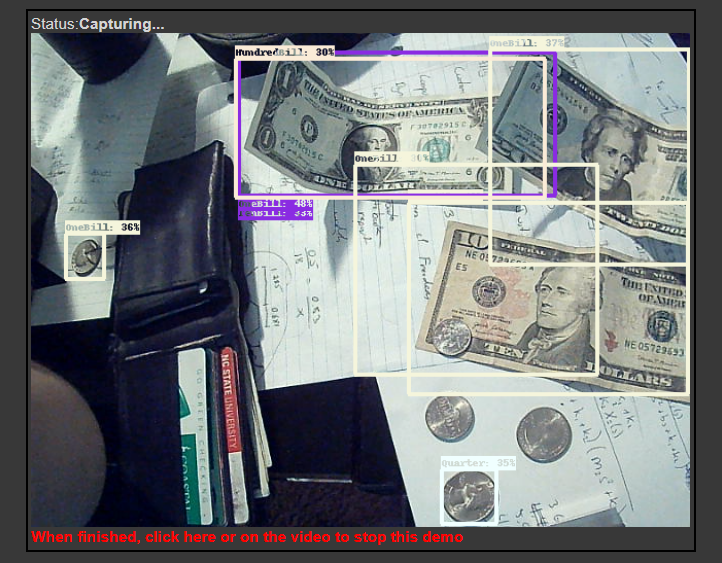


## Future Work

We’re not very satisfied with these results, so we plan to make changes in order to achieve a better performing model. We plan to gather more data, change the pre-trained model we use for transfer learning, and possibly change some hyper-parameters so that training yields better results.

NOTE: Improvements to these issues were address in our final presentation slides (see PDF in this folder).